In [1]:
# 线性回归模型
# 机器学习：通过已知训练集样本数据，应用各种机器学习算法，训练出模型，以验证集数据检验模型的泛化能力，以期望在测试集上的预测能够好的效果
# 一般样本数据都是以表格数据的形式呈现，包含属性头和index索引列，多个属性列构成样本的多个特征，我们把属性列刻画成一个向量X，其中每个属性
# 即为它的分量，而样本数据的结果设定为方程的y值，即构成了关于结果y与属性X的方程组
# 线性回归模型要求误差项满足正太分布，即可使用最大似然估计，求得损失函数
# 如下表示：

一个训练样本：$\{(x^{(i)},y^{(i)})\}$

训练样本集：$\{(x^{(i)},y^{(i)});i=1,2,...,N\}$

$\{(x_1^{(i)},x_2^{(i)},y^{(i)})\}→\{\boldsymbol{x}^{(i)},y^{(i)})\},
\boldsymbol{x}^{(i)} = 
\left[
    \begin{matrix}
    x_1^{(i)}\\
    x_2^{(i)}
    \end{matrix}
\right]$

In [2]:
# 线性回归从最小均方误差的角度来思考，就是使得我们习得的模型预测出的y值要尽量与真实值接近
# 如何学习这个模型？最大似然估计，最大后验估计，优化理论，最大熵模型等
# 先从优化理论开始，分为：
# 1、无约束优化
# 2、有约束优化

试图学习：$f(x) = wx + b$ 使得$f(x^{(i)})≈y^{(i)}$ - 单变量

试图学习：$f(x) = \boldsymbol{w}^Tx + b$ 使得$f(\boldsymbol{x}^{(i)})≈y^{(i)}$ - 多变量
其中b为常数，为截距

In [3]:
# 另一种数学符号和公式表达方法，暂时没研究！

In [4]:
from sympy import *
init_printing()

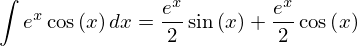

In [5]:
x = symbols('x')
a = Integral(cos(x)*exp(x), x)
Eq(a, a.doit())

In [6]:
# 1、无约束优化，又分为凸函数和非凸函数
# 一般可以使用梯度分析和迭代法来求得最优解
# 凸函数：可以找到全局最优解
# 非凸函数：可以找到局部最优解
# 对于一般的无约束优化问题：

自变量为标量和函数$f:\mathbb{R}→\mathbb{R}$ $$\mbox{min $f(x)$ $x∈\mathbb{R}$}$$
自变量为向量的函数$f:\mathbb{R}^n→\mathbb{R}$ $$\mbox{min $f(\boldsymbol{x})$ $\boldsymbol{x}∈\mathbb{R}^n$}$$

In [7]:
# 优化问题可能出现的极值点：
# 极小值，极大值和鞍点
# 极小值和极大值分为全局和局部
# 鞍点的解释有多种：
# 1、在微分方程中，一个方向稳定，另一个方向不稳定的奇点；
# 2、在泛函中，既不是极大值，也不是极小值的临界点；
# 3、在矩阵中，某行的最大值，在该列的最小值；
# 4、物理上，一个方向的极大值，另一个方向的极小值
# 如函数f(x)=x^n n=1,3,5,...这样的奇数，该函数有平稳点，但是既不是极大值，也不是极小值
# 大部分函数都是非凸函数，只能找到局部极值

In [8]:
# 1、梯度为0法，求解
# 梯度和Hessian矩阵
# 很明显在高维属性的情况下，求Hessian矩阵是非常复杂的
# 二阶导比一阶导下降的快，如何理解？
# 如果从物理速度的角度来理解，一阶导数是瞬时速度，也就是加速度；二阶导数即是加速度的快慢程度，即是优化最大加速度，一阶导数每次迭代仅是找到当时
# 的加速度，并不能找到全局的最优的加速度，所以说二阶导数，直接蹦着最优加速度去的在，自然下降的速度也就更快，反应的是加速度的变化

一阶导数对应梯度：
$$f'(\boldsymbol{x}); g(\boldsymbol{x}) = ∇f(\boldsymbol{x}) = 
\left[
    \begin{matrix}
    \frac{∂f(\boldsymbol{x})}{∂x_1} \\
    . \\
    . \\
    . \\
    \frac{∂f(\boldsymbol{x})}{∂x_n}
    \end{matrix}
\right]$$

二阶导数对应Hessian矩阵：
$$f''(\boldsymbol{x}); H(\boldsymbol{x}) = ∇^2f(\boldsymbol{x}) = 
\left[
    \begin{matrix}
    \frac{∂^2f(\boldsymbol{x})}{∂x_1^2} & \frac{∂^2f(\boldsymbol{x})}{{∂x_1}{∂x_2}} & ... & \frac{∂^2f(\boldsymbol{x})}{{∂x_1}{∂x_n}} \\
    \frac{∂^2f(\boldsymbol{x})}{{∂x_2}{∂x_1}} & \frac{∂^2f(\boldsymbol{x})}{∂x_2^2} & ... & \frac{∂^2f(\boldsymbol{x})}{{∂x_2}{∂x_n}}\\
    \vdots & \vdots & \ddots & \vdots\\
    \frac{∂^2f(\boldsymbol{x})}{{∂x_n}{∂x_1}} & \frac{∂^2f(\boldsymbol{x})}{{∂x_n}{∂x_2}} & ... & \frac{∂^2f(\boldsymbol{x})}{∂x_n^2}
    \end{matrix}
\right] = ∇(∇f(\boldsymbol{x}))^T$$

In [9]:
# 二次型应用：最小二乘法
# 任意2次多项式都可以用二次型表示
# 二次型定义：

- 给定矩阵$A∈\mathbb{R}^{nxn}$，函数
$$\begin{equation*}
\boldsymbol{x}^T\boldsymbol{A}\boldsymbol{x} = \sum_{i=1}^nx_i(\boldsymbol{A}\boldsymbol{x})_i = \sum_{i=1}^nx_i\left(\sum_{j=1}^na_{ij}x_j\right) = \sum_{i=1}^n\sum_{j=1}^nx_ix_ja_{ij}
\end{equation*}$$

In [10]:
# 二次型性质：

- 给定对称矩阵$A∈\mathbb{R}^{nxn}$，如果对于所有$\boldsymbol{x}∈\mathbb{R}^n$，有$\boldsymbol{x}^T\boldsymbol{Ax}\ge0$，则为$\boldsymbol{A}$半正定矩阵，此时特征值$λ(\boldsymbol{A})\ge0$

- 如果对于所有$\boldsymbol{x}∈\mathbb{R}^n$，有$\boldsymbol{x}^T\boldsymbol{Ax}>0$，$\boldsymbol{x}\ne\boldsymbol{0}$，则$\boldsymbol{A}$为正定矩阵

- $\boldsymbol{A}$为负定矩阵，有$\boldsymbol{x}^T\boldsymbol{Ax}<0$

- 不定矩阵，既可能>0，也可能<0

In [11]:
# 在实际应用，很多问题都可以转换成二次型，通过矩阵的正负定，来观察其特征值值等情况
# 其实也是在多变量的情况将其转换为矩阵，以矩阵的方式来研究二次函数
# 再引入高阶泰勒展开，一阶形式就是个二次型，通过求这个二次型的极值来得到原函数在极值点的近似解
# 关于二次型的详细参考：https://www.zhihu.com/question/38902714?from=profile_question_card
# 在数学中，有如下对应关系：

对称矩阵 $\Longleftrightarrow$ 二次型矩阵 $\Longleftrightarrow$ 二次型

In [12]:
# 高阶求导：

* 向量$\boldsymbol{a}$和$\boldsymbol{x}$无关，则$∇\left(\boldsymbol{a^Tx}\right) = \boldsymbol{a}$，$∇^2\left(\boldsymbol{a^Tx}\right) = \boldsymbol{0}$

* 对称矩阵$\boldsymbol{A}$和$\boldsymbol{x}$无关，则$∇\left(\boldsymbol{x^TAx}\right) = 2\boldsymbol{Ax}$，$∇^2\left(\boldsymbol{x^TAx}\right) = 2\boldsymbol{A}$

In [13]:
# 最小二乘：
# 数学本质是最小化系数矩阵张成的向量空间到观察向量的欧式距离
# 详情参考：https://www.zhihu.com/question/37031188

$f(x) = \|\boldsymbol{Ax-b}\|_2^2 = (\boldsymbol{Ax-b})(\boldsymbol{Ax-b}) = \boldsymbol{A^Tx^TAx-A^Tx^Tb-Axb^T+b^Tb}$，

因$\boldsymbol{A^Tx^Tb}$和$\boldsymbol{Axb^T}$乘积都为常数，而$\boldsymbol{A^Tx^Tb}$ = $\boldsymbol{Axb^T}$，

上式进一步化简得：$\boldsymbol{A^Tx^TAx-2Axb^T+b^Tb}$

对$\boldsymbol{x}$求导，$∇f(\boldsymbol{x})=2\boldsymbol{A^TAx-A^Tb}$

In [14]:
# 最小二乘的向量矩阵二次型表达式：

$$f(\boldsymbol{x})=\boldsymbol{x^TAx+2b^Tx}+c$$

In [15]:
# 泰勒级数：是一种对高次曲线的近似拟合，特别是在极值点的近似求解
# 当n足够大，泰勒级数就可以近似任何函数，不仅如sin(x) e^x等 是一把幂函数的近似线性组合表达
# 泰勒级数展开(标量和向量)

### 关于泰勒级数的一些tips：

作者：George Chuy
链接：https://www.zhihu.com/question/28486177/answer/129933751
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

问：泰勒级数在干嘛？答：做近似。你随便给我一个函数，它的表达式可能非常复杂，甚至没有表达式。但是幂函数们有很简单的表达式，性质也很清楚。所以人就会想要，把简单的东西组合起来（线性组合），来代替一个复杂的东西。

问：收敛域是干嘛的？答：要是你只对一个函数在很小的一个自变量范围（领域）内的性质感兴趣，你就可以用泰勒级数这个工具。其实泰勒级数只是一套更复杂的工具（函数空间）的一种功能，一种应用而已。

问：函数空间是什么东西？和泰勒级数有什么不一样？答：泰勒级数只关心曲线的一小段儿，但是如果你有了函数空间这个东西，你就可以对整段曲线，做一个近似或者代替。

问：为什么泰勒级数一定要用幂函数来近似或者代替呢?答：没错，你可以用别的函数，像正弦函数（傅里叶级数）或者是脉冲函数（只在一个点不为零，别的地方都为零）。

问：什么叫函数空间？答：人用其函数空间来，觉得他跟矢量空间很像，所以给他了一个空间的名字。在矢量空间里，你随便给一个矢量，我只要有一组完备的基本矢量，就能够完全精确地来代替他。（不再是近似哦。）在函数空间里，要是我们手里有个把的幂函数，我们要是派给他们每人一个合适的系数，就能够让他们的组合，在一个范围里边儿，非常像你最早给我的那个函数。其实呢，要是你把所有的幂函数都给我的话，他们就能够表示随便一个什么函数。也就是说，如果他们是完备的，他们就不再是近似了而是代替，是在整个曲线上没有误差的描述，不再是在曲线的一小段上的描述。

说明：这边令$\boldsymbol{g^T(x_k)}=f'(\boldsymbol{x_k})$

* 输入为标量的泰勒级数展开
$$f(x_k+δ) ≈ f(x_k) + f'(x_k)δ + \frac{f''(x_k)δ^2}{2}+ ... + \frac{f^k(x_k)δ^k}{k!} + ...$$

> 说明：$x = x_k + \delta$

* 输入为向量的泰勒级数展开
$$f(\boldsymbol{x_k+δ}) ≈ f(\boldsymbol{x_k}) + \boldsymbol{g^T(x_k)δ} + \frac{\boldsymbol{δ^TH(x_k)δ}}{2}$$

In [16]:
# 泰勒级数和极值
# 泰勒级数：用泰勒的多项展开来近似高次函数在极值点的近似解
# 详细参考：https://www.zhihu.com/question/21149770
# 标量情况

* 输入为标量的泰勒级数展开
$$f(x_k+δ) ≈ f(x_k) + f'(x_k)δ + \frac{f''(x_k)δ^2}{2}$$

* 严格局部极小点有：$f(x_k+δ) \ge f(x_k)$

In [17]:
# 如下图为凸函数

Text(-40,1600,'$f(x_k-δ)>f(x_k)$')

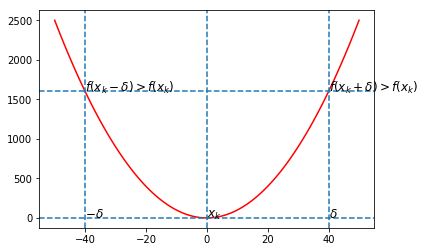

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-50,50,100)
y = x**2
plt.plot(x,y,c='r')
plt.axvline(x=0,linestyle='--')
plt.axvline(x=40,linestyle='--')
plt.axvline(x=-40,linestyle='--')
plt.axhline(y=40**2,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.text(0,0,s='$x_k$',fontsize=12)
plt.text(40,0,s='$δ$',fontsize=12)
plt.text(-40,0,s='$-δ$',fontsize=12)
plt.text(40,1600,s='$f(x_k+δ)>f(x_k)$',fontsize=12)
plt.text(-40,1600,s='$f(x_k-δ)>f(x_k)$',fontsize=12)

In [19]:
# 解释：因要求f(xk+δ)≥f(xk)，而δ可正可负，那只能f′(xk)=0

* 称满足$f'(x_k)$ = 0的点为平稳点(候选点)

In [20]:
# 说明：此处候选点有极大值、极小值和鞍点

* 函数在$x_k$有严格局部极小值条件为$f'(x_k)'$ = 0且$f''(x_k)$ > 0

In [21]:
# 解释：因f′(xk)=0了，上述泰勒级数要满足条件，只能f″(xk) > 0
# 因要求满足f(x_k+δ)>=f(x_k)，而f′(xk)=0，要泰勒近似条件就必须f″(xk)>0

In [22]:
# 向量情况

* 输入为向量的泰勒级数展开
$$f(\boldsymbol{x_k+δ}) ≈ f(\boldsymbol{x_k}) + \boldsymbol{g^T(x_k)δ} + \frac{\boldsymbol{δ^TH(x_k)δ}}{2}$$

* 称满足$\boldsymbol{g^T(x_k)}$ = 0的点为平稳点(候选点)，此时如果有$\boldsymbol{H(x_k)} \succ 0$，$x_k$为一严格局部极小点(反之，严格局部最大点) 如果$\boldsymbol{H(x_k)}$为不定矩阵，则是一个鞍点 既不是极大值 也不是极小值

In [ ]:
# 判断严格局部极小点的条件：
# 一阶导=0，二阶导大于0
# 二阶导小于0为极大点
# 二阶导等于0，则需要三阶导来判断

In [23]:
# 梯度为0求解的局限性
# 原函数如果很复杂，求导函数必然也很复杂，要求解极值点，固然是很困难的

如计算：$f(x)=x^4+sin(x^2)-ln(x)e^x+7$的导数

$f'(x) = 4x^3 + 2xcos(x^2) - \frac{e^x}{x} - ln(x)e^x$

令其$f'(x)$ = 0，显然很难求得解$x$

In [24]:
# 说明：此时，就可以选择迭代法求解

In [25]:
# 2、迭代法求解

In [26]:
# 迭代法的基本结构(最小化f(x))

1、选择一个初始点，设置一个容忍度$\epsilon$(循环停止条件)，计数$k$ = 0

In [27]:
# 说明：初始点的选择会影响结果，不同的初始点会选取不同的下降路径，应尽量多选择几个初始点
# 就比如说我们在GMM中，使用EM算法计算模型参数，选择初始值建议先使用k-means找到质心μ和对应的Σ，还有π，会加快迭代速度

2、决定搜索方向$\boldsymbol{d_k}$，使得函数下降

3、决定步长$α_k$使得$f(\boldsymbol{x_k}+α_k\boldsymbol{d_k})$对于$α_k \ge 0$最小化，构建$\boldsymbol{x_{k+1}=x_k}+α_k\boldsymbol{d_k}$

In [28]:
# 说明：步长αk的选择，可以自定义初始值，一般为0.01,0.1大小，也可以通过利用偏导求极值得到

4、如果$\|\boldsymbol{d_k}\|$ < $\epsilon$，则停止输出解$\boldsymbol{x_{k+1}}$；否则继续重复迭代

In [29]:
# 解释：为什么dk的模长作为停止条件？也就是梯度的模长
# 这边的dk是下降的方向，也是梯度的反方向，如果是凸函数，会下降到||dk||=0的极值点
# 这边设置一个停止条件，一般是求解局部极值，以防止诸如鞍点的情况，这种情况会长时间在某个方向上游荡，会耗费时间

In [30]:
# ① 梯度下降法

* $\boldsymbol{d_k} = -\boldsymbol{g(x_k)}$，思考为什么这么取？
$$f(\boldsymbol{x_k+d_k})≈f(\boldsymbol{x_k})+\boldsymbol{g^T(x_k)d_k}$$

* 要使$f(\boldsymbol{x_k+d_k})\downarrow$且要最快，梯度为正，最小值为向量$0$，所以只能$f(\boldsymbol{x_k})$加个负数，且为负梯度方向$\boldsymbol{g(x_k)}$

* 我们可以从两个向量的内积考虑，$\boldsymbol{a.b} = \boldsymbol{a^Tb} = \|\boldsymbol{a}\|\|\boldsymbol{b}\|cos(\theta)$

In [31]:
# 解释：两向量内积的最大值，为θ为180°

In [32]:
# ② 牛顿法
# 说明：梯度下降法使用的一阶导项，舍去了二阶导项，其实二阶导项还是占据很大比重的
# 另外使用二阶导，下降速度更快，为什么这么说呢？梯度下降只是在保留一阶项时求得的最优解，并不是二阶导的最优值
# 或者说可以这么理解，一阶导是斜率，二阶导是斜率的变化率，自然二阶导直接蹦着最佳斜率去的

* 方向选取$\boldsymbol{d_k} = - \boldsymbol{H^{-1}}(\boldsymbol{x_k})\boldsymbol{g}(\boldsymbol{x_k})$

* 方向选取依据
$$f(\boldsymbol{x_k+d_k}) ≈ f(\boldsymbol{x_k}) + \boldsymbol{g^T(x_k)d_k} + \frac{\boldsymbol{d_k^TH(x_k)d_k}}{2}$$

* 令$\frac{∂f(\boldsymbol{x_k+d_k})}{∂\boldsymbol{d_k}} = \boldsymbol{0} \Rightarrow \boldsymbol{g}(\boldsymbol{x_k})
+\boldsymbol{H}(\boldsymbol{x_k})\boldsymbol{d_k} = \boldsymbol{0}$

* 若Hessian矩阵正定，则有$\boldsymbol{d_k} = - \boldsymbol{H^{-1}}(\boldsymbol{x_k})\boldsymbol{g}(\boldsymbol{x_k})$

In [33]:
# 解释：同时要求Hessian矩阵可逆，并且正定
# 正定矩阵一定可逆：它的特征值分解都为正，行列式也就不可能等于0
# 要求Hessian矩阵正定：将dk=−H−1(xk)g(xk)带入原式中，可得到只有当Hessian为正定，也就是>0时，才能保证整个式子是下降的

In [34]:
# 牛顿法关键点

* 实际工程中Hessian矩阵$H$很难求，$H^{-1}$更加难求

In [35]:
# 说明：采用牛顿法，需要消耗大量的内存和计算量，一般在特征值较少，梯度法失效，可以减少一定的迭代时间

In [36]:
# 一种情况，Hessian矩阵若不是正定矩阵，可对Hessian矩阵进行修正：

$\boldsymbol{H}(\boldsymbol{x_k})+\boldsymbol{E}$，典型的方法$\boldsymbol{E} = δ\boldsymbol{I}$，δ>0很小。思考为什么这么取？

In [37]:
# 解释：若H(xk)非正定矩阵，那最直接的想法就是加上一个正定矩阵，使得H(xk)变得正定，最简单的方法自然是加上一个δ>0的倍的单位阵I
# 也可以使用迭代法取修正

In [38]:
# 介于存在Hessian矩阵难求，其逆更难求，以及Hessian矩阵会出现非正定的情况，出现了拟牛顿法的选择

In [39]:
# ③ 拟牛顿法
# 核心思想

* 统一深度下降法和牛顿法：
$$\boldsymbol{d_k} = -\boldsymbol{S_kg_k}$$
其中$\boldsymbol{S_k} = 
\begin{cases} 
      \boldsymbol{I} & steepest \\
      \boldsymbol{H_k^{-1}} & Newton \\
\end{cases}$

* 不直接求$\boldsymbol{H_k^{-1}}$，尝试用一正定矩阵逼近$\boldsymbol{H_k^{-1}}$(一阶的量慢慢近似二阶的量)

* 定义$\boldsymbol{δ_k=x_{k+1}-x_k}$，$\boldsymbol{γ_k=g_{k+1}-g_k}$

* 需要$\boldsymbol{S_{k+1}γ_k=δ_k}$，为什么？

In [40]:
# 解释如下：

$\boldsymbol{S_{k+1}} = \large\boldsymbol{\frac{δ_k}{γ_k}} = \large\boldsymbol{\frac{x_{k+1}-x_k}{g_{k+1}-g_k}}$，
而因$\large\boldsymbol{\frac{g_{k+1}-g_k}{x_{k+1}-x_k}}$恰为二阶导数的极限表示形式，继而有$\large\boldsymbol{\frac{x_{k+1}-x_k}{g_{k+1}-g_k}}$为二阶导数的逆，由此得到近似矩阵的逆

In [41]:
# 二阶导数的极限表示形式：

$
\lim_{n \to \infty}
\sum_{x=1}^n \large\frac{f'(x+δ)-f'(x)}{δ}
$

* 只有$\boldsymbol{δ_k}$和$\boldsymbol{γ_k}$，是无法计算出$\boldsymbol{S_{k+1}}$的，继续用迭代的方法

In [42]:
# 说明：δk和γk都是向量，而Sk+1是矩阵，是无法求得的
# 我们就用迭代的方法不断近似这个Hessian矩阵的逆
# 常用的迭代方法有DFP和BFGS
# DFP

* 给定初始$\boldsymbol{S_0}=\boldsymbol{I}$

* $\boldsymbol{S_{k+1}} = \boldsymbol{S_k} + \triangle\boldsymbol{S_k}$，$k=0,1,...$

* $\triangle\boldsymbol{S_k}$ = $α\boldsymbol{uu^T}$ + $β\boldsymbol{vv^T}$，因此
$$\boldsymbol{S_{k+1}} = \boldsymbol{S_k} + α\boldsymbol{uu^T} + β\boldsymbol{vv^T}$$

In [43]:
# 说明：为什么要如此选择△Sk = αuuT + βvvT，确保每次迭代更新Sk+1都是正定的

* 两边乘以$\boldsymbol{γ_k}$，有$\boldsymbol{δ_k} = \boldsymbol{S_kγ_k} + \boldsymbol{\underbrace{\left(αu^Tγ_k\right)}_{1}u} + \boldsymbol{\underbrace{\left(βv^Tγ_k\right)}_{-1}v}$

In [44]:
# αuTγk和βvTγk都是两向量内积的形式，为一个常数

* 令$\boldsymbol{(αu^Tγ_k)} = 1$，$\boldsymbol{(βv^Tγ_k)} = -1$，上式得$\boldsymbol{S_kγ_k} + \boldsymbol{u} - \boldsymbol{v}$

In [45]:
# 说明：u和v都是未知量，我们可以调整αuTγk和βvTγk的值，令其(αuTγk)=1, (βvTγk)v)=−1

* 由此解出$α = \frac{1}{\boldsymbol{u^Tγ_k}}$，$β = -\frac{1}{\boldsymbol{v^Tγ_k}}$，且有$\boldsymbol{u} - \boldsymbol{v} = \boldsymbol{δ_k} - \boldsymbol{S_kγ_k}$，通过解方程可得$\boldsymbol{u}$和$\boldsymbol{v}$，从而最终解得：

* DFP更新公式
$$\boldsymbol{S_{k+1}} = \boldsymbol{S_k} + \boldsymbol{\frac{δ_kδ_k^T}{δ_k^Tγ_k} - \frac{S_kγ_kγ_k^TS_k}{γ_k^TS_kγ_k}}$$

In [46]:
# 说明：
# 几点注意：1、整个迭代过程中需要保证Sk+1始终是正定矩阵；2、不断调整αuTγk和βvTγk的值，使得满足条件 u,v,γk都是向量
# 为什么说是用一阶导数的量在近似二阶导数的量？
# 从上述更新公式中也可以看出γk涉及到gk的一阶导，另外本身在设定时，采用了二阶导极限的逆矩阵近似
# 每次dk方向的决定都来自于上次的-Skgk
# Sk = I时，就是梯度下降

In [47]:
# BFGS
# 对于δk和γk的选择不同

BFGS：$\boldsymbol{S_0}=\boldsymbol{I}$
$$\boldsymbol{S_{k+1}} = \boldsymbol{S_k} + \left(1 + \boldsymbol{\frac{γ_k^TS_kγ_k}{δ_k^Tγ_k}}\right)\boldsymbol{\frac{δ_kδ_k^T}{δ_k^Tγ_k}} - \boldsymbol{\frac{δ_kγ_k^TS_k + S_kγ_kδ_k^T}{δ_k^Tγ_k}}$$

In [48]:
# DFP和BFGS在算法效率上差不多，只不过是选择使用BFGS的较多

In [49]:
# 步长α求取，实际工程中每次迭代使用设定的固定步长

* 每次迭代固定步长，实际中最常用，例如$α_k$ = $α$ = 0.1

* 求导。例如$f(\boldsymbol{x})=\boldsymbol{x^TAx+2b^Tx}+c$，需要解$min_{α \ge 0} f(\boldsymbol{x}+α\boldsymbol{d})$则$h(α) = f(\boldsymbol{x}+α\boldsymbol{d})$，则有$\frac{\partial{h(α)}}{\partialα} = 0 \Rightarrow α = -\boldsymbol{\frac{d^T\nabla{f(x)}}{2d^TAd}}$

链式法则对$α$求偏导，设$\boldsymbol{u} = \boldsymbol{x} + α\boldsymbol{d}$, 则有$\boldsymbol{f(u)} = \boldsymbol{u^TAu} + \boldsymbol{2b^Tu} + c$

$\boldsymbol{f'(u)} = \boldsymbol{\frac{∂h(α)}{∂u}} = 2\boldsymbol{Au} + 2\boldsymbol{b^T}$

$\boldsymbol{u'(α)} = \boldsymbol{\frac{∂u}{∂α}} = \boldsymbol{d^T}$

$\boldsymbol{f'(x)} = \boldsymbol{\frac{df}{dx}} = 2\boldsymbol{(Ax + b^T)} \Rightarrow 2\boldsymbol{Ax} = \boldsymbol{f'(x)} -2\boldsymbol{b^T} \Rightarrow \boldsymbol{x} = \frac{\boldsymbol{f'(x) - 2b^T}}{2A}$

$\boldsymbol{h'(α)} = \boldsymbol{\frac{∂h(α)}{∂u}}\boldsymbol{\frac{∂u}{∂α}} = 2\boldsymbol{(Ax + b^T)}\boldsymbol{d^T} = 2\boldsymbol{d^T}\boldsymbol{[A(x+αd) + b^T]}
		    = 2\boldsymbol{d^T}[\boldsymbol{A}(\frac{(f'(x) - 2b^T)}{2A}+α\boldsymbol{d}) + \boldsymbol{b^T}]
		    = 2\boldsymbol{d^T}(\boldsymbol{\frac{f'(x)}{2} - b^T + b^T} + α\boldsymbol{dA})
		    = 2\boldsymbol{d^T}(\boldsymbol{\frac{f'(x)}{2}} + α\boldsymbol{dA})
		    = \boldsymbol{d^Tf'(x)} + 2α\boldsymbol{d^TAd} = 0$

则求得 $α = -\frac{\boldsymbol{d^Tf'(x)}}{2\boldsymbol{d^TAd}}$

* 不精确的线搜索和Armijo条件

$$f(\boldsymbol{x_k}+α\boldsymbol{d_k}) < f(\boldsymbol{x_k}) + c_1α\boldsymbol{g^T(x_k)d_k}$$

设置$c_1 = 10^{-4}$。先从$α= 1$开始搜，如果Armijo条件不满足，设置一回调因子$β∈(0,1)$，将步长下调至$α = βα$。如果还不满足，继续回调，从而保证步长不至于太小。

In [50]:
# 线性回归模型求解
# 求解方法1：利用梯度等于0

* 试图学习：$f(x) = \boldsymbol{w}^Tx + b$ 使得$f(\boldsymbol{x}^{(i)})≈y^{(i)}$

* 令未知$\boldsymbol{\bar{w}} = \left[\begin{matrix}\boldsymbol{w}\\b\end{matrix}\right]$，已知$\boldsymbol{X} = 
\left[
    \begin{matrix}
    \boldsymbol{x}^{(1)T} & 1 \\
    \vdots & \vdots \\
    \boldsymbol{x}^{(N)T} & 1
    \end{matrix}
\right]_{Nx(d+1)}$，
则有$$\boldsymbol{y≈X\bar{w}}$$

* 损失函数$\|\boldsymbol{y-X\bar{w}}\|_2^2$，求解$$min\hspace{0.1cm}\|\boldsymbol{y-X\bar{w}}\|_2^2$$

In [51]:
# 说明：上述式子很明显是一个二次型

* $g(\boldsymbol{\bar{w}}) = 0 \Rightarrow 2\boldsymbol{X^T(X\bar{w}-y)} = 0 \Rightarrow \boldsymbol{\bar{w}^*} = \boldsymbol{(X^TX)^{-1}X^Ty}$

对上式使用链式法则求导，令$\boldsymbol{u=X\bar{w}−y}$，得到$min\hspace{0.1cm}\|\boldsymbol{u}\|_2^2$，对$\bar{w}$求偏导，
$g(\boldsymbol{\bar{w}}) = \boldsymbol{\frac{∂g(\bar{w})}{∂u}}\boldsymbol{\frac{∂u}{∂\bar{w}}} = 2\boldsymbol{uX^T} = 2\boldsymbol{X^T(X\bar{w}−y)}$

* 适当时，需要加入正则化项，防止过拟合

In [52]:
# 求解方法2：梯度下降法

* 梯度下降法 $$g(\boldsymbol{\bar{w}}) = 2\boldsymbol{X^T(X\bar{w}−y)} = 2\sum_{i=1}^N\boldsymbol{x^{(i)}\left(w^Tx^{(i)}-y^{(i)}\right)}$$
$$\boldsymbol{\bar{w}}\leftarrow\boldsymbol{\bar{w}}-αg(\boldsymbol{\bar{w}})$$

* 随机梯度下降法SGD(实际中很有用)
$$\Big \{i=1:N,2\boldsymbol{x^{(i)}\left(w^Tx^{(i)}-y^{(i)}\right)}\Big \}$$

In [53]:
# 说明：因为批量梯度下降法，每次迭代都需要遍历所有样本，小样本量还好，大样本数据收敛时间会变长

In [54]:
# 为什么说牛顿法比梯度下降法下降速度更快？
# 1、梯度下降法为一阶导数，牛顿法为二阶导数，几何意义上，二次函数近似更准确，一阶导数是梯度，二阶导数是梯度的梯度；
# 2、梯度下降是保证每次都是朝着下降的方向走的，能够先找到局部最优点，而对于非凸函数，先使用梯度下降就比较好，保证能够找到最优点，不一定是全局的，而对于凸函数，使用牛顿法，就一步到位了；
# 3、牛顿法是要求hessian矩阵的，在高次项中，也就是说维数很高时，求hessian矩阵是很难的，它的逆就更难了，非常耗内存，计算量也大
# 4、梯度下降不容易收敛，会在极值点附近震荡，牛顿法则比较容易收敛
# 5、实际工程中，可能会先使用梯度下降，找到一个局部点，再使用牛顿法，或者直接使用拟牛顿法
# 参考：https://www.zhihu.com/question/19723347

In [55]:
# 在scipy.optimize.minimize模块中有多种算法选择
# 而无约束梯度分析和迭代法都不仅限于线性回归问题
# 模块sklearn.linear_model.LinearRegression并未指明使用何种方法求解

In [56]:
# 梯度下降算法：
# 说明：learning_rate为学习率或为步长，norm_grad为搜索方向的模长，fun_val为每次迭代得到的函数值可以理解为损失函数每次迭代的值
# 这边矩阵A，截距b和初始点x0，还有停止条件epsilon为选定值
# 这边的损失函数被写成了二次型形式，因任何二次多项式都可以用二次型来表示，如线性回归的最小均方误差

import numpy as np

def gradient_method_quadratic(*args):
    x=x0
    i=0
    grad=2*(A.dot(x)+b)
    while np.linalg.norm(grad)>epsilon:
        i=i+1
        t=np.square(np.linalg.norm(grad))/(2*grad.T.dot(A).dot(grad))
        x=x-t*grad
        grad=2*(A.dot(x)+b)
        fun_val=x.T.dot(A).dot(x)+2*b.T.dot(x)
        print('iter_numer=%i,learning_rate=%2.6f,norm_grad=%2.6f,fun_val=%2.6f' %(i,t,np.linalg.norm(grad),fun_val))
        
if __name__ == '__main__':       
    A=np.array([[1,0],[0,5]])
    b=np.array([0,0])
    x0=np.array([2,2])
    epsilon=np.exp(-16)
    gradient_method_quadratic(A,b,x0,epsilon)

iter_numer=1,learning_rate=0.103175,norm_grad=3.237473,fun_val=2.539683
iter_numer=2,learning_rate=0.433333,norm_grad=2.158315,fun_val=0.268749
iter_numer=3,learning_rate=0.103175,norm_grad=0.342590,fun_val=0.028439
iter_numer=4,learning_rate=0.433333,norm_grad=0.228393,fun_val=0.003009
iter_numer=5,learning_rate=0.103175,norm_grad=0.036253,fun_val=0.000318
iter_numer=6,learning_rate=0.433333,norm_grad=0.024169,fun_val=0.000034
iter_numer=7,learning_rate=0.103175,norm_grad=0.003836,fun_val=0.000004
iter_numer=8,learning_rate=0.433333,norm_grad=0.002558,fun_val=0.000000
iter_numer=9,learning_rate=0.103175,norm_grad=0.000406,fun_val=0.000000
iter_numer=10,learning_rate=0.433333,norm_grad=0.000271,fun_val=0.000000
iter_numer=11,learning_rate=0.103175,norm_grad=0.000043,fun_val=0.000000
iter_numer=12,learning_rate=0.433333,norm_grad=0.000029,fun_val=0.000000
iter_numer=13,learning_rate=0.103175,norm_grad=0.000005,fun_val=0.000000
iter_numer=14,learning_rate=0.433333,norm_grad=0.000003,fun_